In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import xlrd

In [2]:
df = pd.read_excel("Medexis_Datos.xlsx")
df

,ID,FechaIngreso,PacienteFechaNacimiento,PacienteSexo,DiasInternacion,CondicionAlCierre,NotaFechaHora,ArqutipoNombre,NotaArquetipoValorIngresado
0,318849,2022-01-01 08:35:00.000,1990-08-10 00:00:00.000,FEMENINO,2,ALTA MEDICA,2022-01-01 09:19:28.000,Frecuencia Cardiaca,78
1,318849,2022-01-01 08:35:00.000,1990-08-10 00:00:00.000,FEMENINO,2,ALTA MEDICA,2022-01-01 09:19:28.000,Frecuencia respiratoria,18
2,318849,2022-01-01 08:35:00.000,1990-08-10 00:00:00.000,FEMENINO,2,ALTA MEDICA,2022-01-01 09:19:28.000,Presion Arterial Maxima,120
3,318849,2022-01-01 08:35:00.000,1990-08-10 00:00:00.000,FEMENINO,2,ALTA MEDICA,2022-01-01 09:19:28.000,Presion Arterial Minima,80
4,318849,2022-01-01 08:35:00.000,1990-08-10 00:00:00.000,FEMENINO,2,ALTA MEDICA,2022-01-01 09:19:28.000,Temperatura,36.3
...,...,...,...,...,...,...,...,...,...
615579,387442,2022-11-05 09:31:00.000,1976-09-05 00:00:00.000,MASCULINO,1,ALTA MEDICA,2022-11-05 16:00:00.000,Frecuencia respiratoria,19
615580,387442,2022-11-05 09:31:00.000,1976-09-05 00:00:00.000,MASCULINO,1,ALTA MEDICA,2022-11-05 16:00:00.000,Presion Arterial Maxima,120
615581,387442,2022-11-05 09:31:00.000,1976-09-05 00:00:00.000,MASCULINO,1,ALTA MEDICA,2022-11-05 16:00:00.000,Presion Arterial Minima,80
615582,387442,2022-11-05 09:31:00.000,1976-09-05 00:00:00.000,MASCULINO,1,ALTA MEDICA,2022-11-05 16:00:00.000,Temperatura,36.4


# Exploración

- ID: Número para identficar al paciente (en forma anónima)	
- FechaIngreso: Fecha y hora en el que el paciente es ingresado a Terapia Intensiva	(UCI)
- PacienteFechaNacimiento: Fecha de nacimiento del paciente. Contiene hora pero sin registrar, toda puesta a cero (dato irrelevante)	
- PacienteSexo: sexo del paciente
- DiasInternacion: cantidad de días que el paciente estuvo en Terapia Intensiva	
- CondicionAlCierre: Cuál fue la situación del paciente al dejar la Terapia Intensiva: alta, defunción, etc.	
- NotaFechaHora: Día y hora en la que se le hizo la medición de "X" signo vital al paciente
- ArqutipoNombre: signo vital que se midió del paciente	
- NotaArquetipoValorIngresado: Resultado numérico de la medición

In [3]:
df.nunique()

ID                              5679
FechaIngreso                    5676
PacienteFechaNacimiento         4576
PacienteSexo                       2
DiasInternacion                   56
CondicionAlCierre                  7
NotaFechaHora                  56353
ArqutipoNombre                     7
NotaArquetipoValorIngresado      775
dtype: int64

In [4]:
df.ArqutipoNombre.unique()

array(['Frecuencia Cardiaca', 'Frecuencia respiratoria',
       'Presion Arterial Maxima', 'Presion Arterial Minima',
       'Temperatura', 'Saturacion O2', 'Presion Arterial Media'],
      dtype=object)

In [5]:
df.CondicionAlCierre.unique()

array(['ALTA MEDICA', 'DERIVADO A OTRA INSTITUCION', 'DEFUNCION',
       'ALTA TECNICA', 'ALTA VOLUNTARIA',
       'CONTINUA ATENCION EN ESTA EMPRESA', 'FUGA'], dtype=object)

In [6]:
df.dtypes

ID                              int64
FechaIngreso                   object
PacienteFechaNacimiento        object
PacienteSexo                   object
DiasInternacion                 int64
CondicionAlCierre              object
NotaFechaHora                  object
ArqutipoNombre                 object
NotaArquetipoValorIngresado    object
dtype: object

In [7]:
df['ID'].value_counts()

354762    8580
324323    7595
318853    6891
330218    6703
323181    4587
          ... 
363054       2
324098       1
373442       1
383983       1
375850       1
Name: ID, Length: 5679, dtype: int64

In [8]:
#Ejemplos de todos los datos de un paciente
df[df['ID']==354762]

,ID,FechaIngreso,PacienteFechaNacimiento,PacienteSexo,DiasInternacion,CondicionAlCierre,NotaFechaHora,ArqutipoNombre,NotaArquetipoValorIngresado
347366,354762,2022-06-26 19:50:00.000,1946-02-27 00:00:00.000,FEMENINO,110,ALTA MEDICA,2022-06-26 22:00:00.000,Frecuencia Cardiaca,107
347367,354762,2022-06-26 19:50:00.000,1946-02-27 00:00:00.000,FEMENINO,110,ALTA MEDICA,2022-06-26 22:00:00.000,Frecuencia respiratoria,33
347368,354762,2022-06-26 19:50:00.000,1946-02-27 00:00:00.000,FEMENINO,110,ALTA MEDICA,2022-06-26 22:00:00.000,Presion Arterial Maxima,125
347369,354762,2022-06-26 19:50:00.000,1946-02-27 00:00:00.000,FEMENINO,110,ALTA MEDICA,2022-06-26 22:00:00.000,Presion Arterial Minima,72
347370,354762,2022-06-26 19:50:00.000,1946-02-27 00:00:00.000,FEMENINO,110,ALTA MEDICA,2022-06-26 22:00:00.000,Presion Arterial Media,87
...,...,...,...,...,...,...,...,...,...
355941,354762,2022-06-26 19:50:00.000,1946-02-27 00:00:00.000,FEMENINO,110,ALTA MEDICA,2022-10-13 13:40:36.000,Presion Arterial Maxima,118
355942,354762,2022-06-26 19:50:00.000,1946-02-27 00:00:00.000,FEMENINO,110,ALTA MEDICA,2022-10-13 13:40:36.000,Presion Arterial Minima,54
355943,354762,2022-06-26 19:50:00.000,1946-02-27 00:00:00.000,FEMENINO,110,ALTA MEDICA,2022-10-13 13:40:36.000,Presion Arterial Media,74
355944,354762,2022-06-26 19:50:00.000,1946-02-27 00:00:00.000,FEMENINO,110,ALTA MEDICA,2022-10-13 13:40:36.000,Temperatura,36.4


# Limpieza 

In [9]:
#Limpieza columna'NotaArquetipoValorIngresado'

df['NotaArquetipoValorIngresado'] = df['NotaArquetipoValorIngresado'].astype(str).str.replace('[-/|+]', '')
df['NotaArquetipoValorIngresado'] = df['NotaArquetipoValorIngresado'].astype(str).str.replace('^[.]', '')
df['NotaArquetipoValorIngresado'] = df['NotaArquetipoValorIngresado'].astype(str).str.replace('[.,]$', '')
df['NotaArquetipoValorIngresado'] = df['NotaArquetipoValorIngresado'].astype(str).str.replace("0&Dolor Intenso", '')

In [10]:
df[df['NotaArquetipoValorIngresado']==5]

,ID,FechaIngreso,PacienteFechaNacimiento,PacienteSexo,DiasInternacion,CondicionAlCierre,NotaFechaHora,ArqutipoNombre,NotaArquetipoValorIngresado


A partir de una rápida observación del DS se descubre que muchas "NotaArquetipoValorIngresado" son igual a 5. Eso no es un valor lógico para ninguno de los signos vitales medidos, pero al haber tantos se considerda que puede tener que ver con alguna forma de comunicación interna del Centro Médico que toma los registros. Se los eliminará, por no poder dar respuesta a su significado y ser nocivo para la aplicación de un modelo de IA.

In [11]:
df.drop(df[df['NotaArquetipoValorIngresado']==5].index, inplace=True)

df[df['NotaArquetipoValorIngresado']==5]

,ID,FechaIngreso,PacienteFechaNacimiento,PacienteSexo,DiasInternacion,CondicionAlCierre,NotaFechaHora,ArqutipoNombre,NotaArquetipoValorIngresado


En la columna 'FechaIngreso' y 'PacienteFechaNacimiento' elimino la hora porque no es de interés para el trabajo

In [12]:
#Limpieza de las columnas 'FechaIngreso' y 'PacienteFechaNacimiento'

#elimino la hora
df['FechaIngreso'] = df['FechaIngreso'].str[:10]
df['PacienteFechaNacimiento'] = df['PacienteFechaNacimiento'].str[:10]



Transformación del tipo (type) de los datos:
- ID: debe ser object porque cumple la función de representar personas y no números
- NotaArquetipoValorIngresado: es un número y no un objeto
- PacienteSexo: es lógico hacerlo categórico por ser un dato de resultado binario
- CondicionAlCierre es lógico hacerlo categórico porque define parámetros estáticos como resultado
- FechaIngreso, PacienteFechaNacimiento y NotaFechaHora: son datos de fecha y se los convierte según el formato de cada uno (incluyendo hora en donde es necesario)


In [13]:
#ID de int a object
df['ID'] = df['ID'].astype(object)

#NotaArquetipoValorIngresado de object a numérico
df['NotaArquetipoValorIngresado'] = pd.to_numeric(df['NotaArquetipoValorIngresado'])

#PacienteSexo y CondicionAlCierre de object a category
df['PacienteSexo'] = df['PacienteSexo'].astype('category') 
df['CondicionAlCierre'] = df['CondicionAlCierre'].astype('category') 

#FechaIngreso, PacienteFechaNacimiento y NotaFechaHora de object a datatime
df['FechaIngreso'] = pd.to_datetime(df['FechaIngreso'], format='%Y-%m-%d')
df['PacienteFechaNacimiento'] = pd.to_datetime(df['PacienteFechaNacimiento'], format='%Y-%m-%d')

df['NotaFechaHora'] = pd.to_datetime(df['NotaFechaHora'], format='%Y-%m-%d %H:%M')

Se eliminan los registros que considero erróneos por estar fuera de los parámetros normales

In [14]:
#df[(df['ArqutipoNombre']== 'Frecuencia Cardiaca') & (df['NotaArquetipoValorIngresado'] < 78)]
df.drop(df[(df['ArqutipoNombre']== 'Frecuencia Cardiaca') & ((df['NotaArquetipoValorIngresado'] < 10) | 
                                                                 (df['NotaArquetipoValorIngresado'] > 200))].index, inplace=True)

df.drop(df[(df['ArqutipoNombre']== 'Frecuencia respiratoria') & ((df['NotaArquetipoValorIngresado'] < 6) | 
                                                                 (df['NotaArquetipoValorIngresado'] > 80))].index, inplace=True)

df.drop(df[(df['ArqutipoNombre']== 'Presion Arterial Maxima') & ((df['NotaArquetipoValorIngresado'] < 10) | 
                                                                 (df['NotaArquetipoValorIngresado'] > 300))].index, inplace=True)

df.drop(df[(df['ArqutipoNombre']== 'Presion Arterial Minima') & ((df['NotaArquetipoValorIngresado'] < 10) | 
                                                                 (df['NotaArquetipoValorIngresado'] > 200))].index, inplace=True)

df.drop(df[(df['ArqutipoNombre']== 'Temperatura') & ((df['NotaArquetipoValorIngresado'] < 30) | 
                                                                 (df['NotaArquetipoValorIngresado'] > 50))].index, inplace=True)

df.drop(df[(df['ArqutipoNombre']== 'Saturacion O2') & ((df['NotaArquetipoValorIngresado'] < 50) | 
                                                                 (df['NotaArquetipoValorIngresado'] > 120))].index, inplace=True)

df.drop(df[(df['ArqutipoNombre']== 'Presion Arterial Media') & ((df['NotaArquetipoValorIngresado'] < 10) | 
                                                                 (df['NotaArquetipoValorIngresado'] > 300))].index, inplace=True)


Se crea una columna de edad de los pacientes

In [15]:
colEdad = (df['FechaIngreso'] - df['PacienteFechaNacimiento']) / np.timedelta64(1, 'Y')

df.insert(3, 'PacienteAnos', colEdad)

df['PacienteAnos'] = df['PacienteAnos'].astype(int)

df.head()

,ID,FechaIngreso,PacienteFechaNacimiento,PacienteAnos,PacienteSexo,DiasInternacion,CondicionAlCierre,NotaFechaHora,ArqutipoNombre,NotaArquetipoValorIngresado
0,318849,2022-01-01,1990-08-10,31,FEMENINO,2,ALTA MEDICA,2022-01-01 09:19:28,Frecuencia Cardiaca,78.0
1,318849,2022-01-01,1990-08-10,31,FEMENINO,2,ALTA MEDICA,2022-01-01 09:19:28,Frecuencia respiratoria,18.0
2,318849,2022-01-01,1990-08-10,31,FEMENINO,2,ALTA MEDICA,2022-01-01 09:19:28,Presion Arterial Maxima,120.0
3,318849,2022-01-01,1990-08-10,31,FEMENINO,2,ALTA MEDICA,2022-01-01 09:19:28,Presion Arterial Minima,80.0
4,318849,2022-01-01,1990-08-10,31,FEMENINO,2,ALTA MEDICA,2022-01-01 09:19:28,Temperatura,36.3


In [16]:
df.dtypes

ID                                     object
FechaIngreso                   datetime64[ns]
PacienteFechaNacimiento        datetime64[ns]
PacienteAnos                            int64
PacienteSexo                         category
DiasInternacion                         int64
CondicionAlCierre                    category
NotaFechaHora                  datetime64[ns]
ArqutipoNombre                         object
NotaArquetipoValorIngresado           float64
dtype: object

# Exploracion Extra

In [17]:
df['FechaIngreso'].min()

Timestamp('2022-01-01 00:00:00')

In [18]:
df['FechaIngreso'].max()

Timestamp('2022-11-05 00:00:00')

El data set tiene registros que van desde el 1º de enero de 2022 al 11 de noviembre de 2022

In [19]:
diasXPaciente = df.groupby("DiasInternacion").agg({"ID": pd.Series.nunique})
print('Cantidad de pacientes por días de internación')
diasXPaciente

Cantidad de pacientes por días de internación


,ID
DiasInternacion,
1,1521
2,2107
3,586
4,349
5,216
6,140
7,124
8,114
9,79


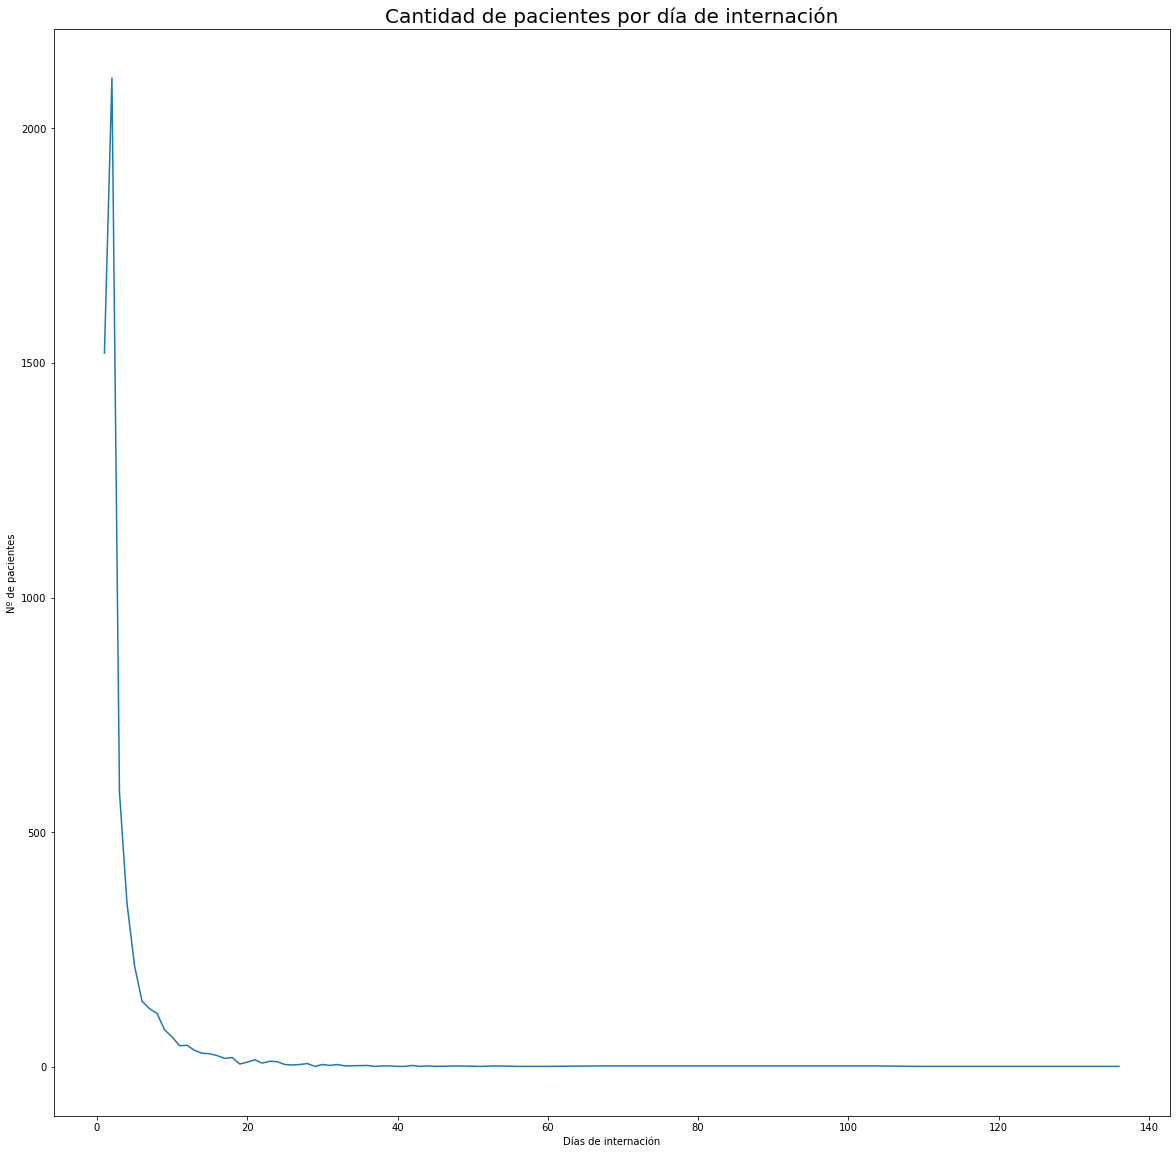

In [20]:
plt.figure(figsize=(20,20)) #tamaño del gáfico
plt.title('Cantidad de pacientes por día de internación', fontsize = 20) #título
plt.xlabel('Días de internación') #nombre de la x
plt.ylabel('Nº de pacientes') #nombre de la y
plt.plot(diasXPaciente)
plt.show()

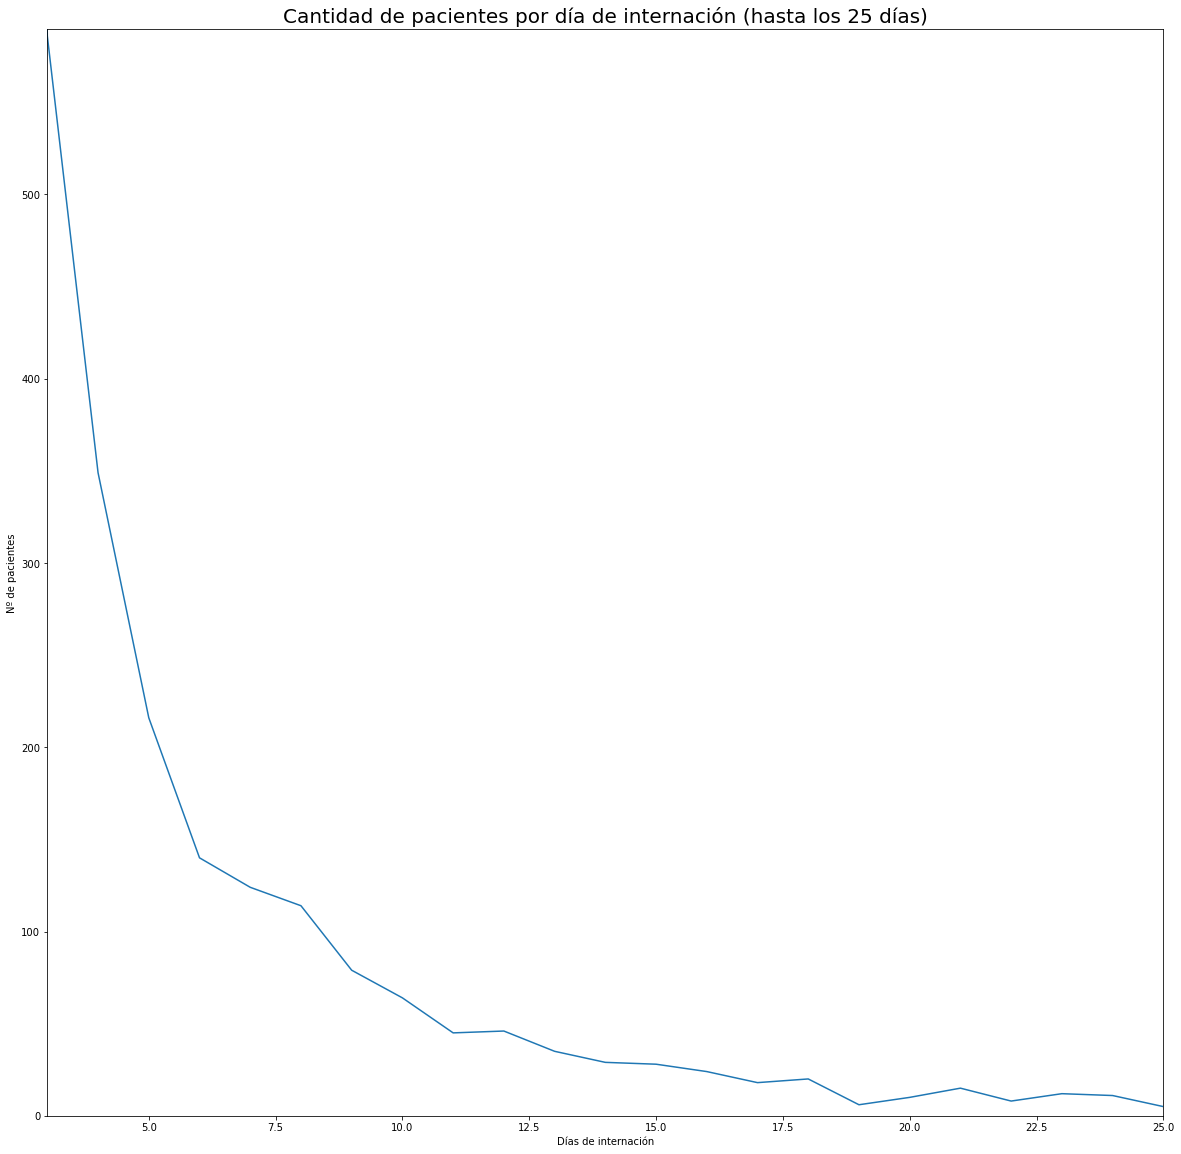

In [21]:
plt.figure(figsize=(20,20)) #tamaño del gáfico
plt.title('Cantidad de pacientes por día de internación (hasta los 25 días)', fontsize = 20) #título
plt.xlabel('Días de internación') #nombre de la x
plt.ylabel('Nº de pacientes') #nombre de la y
plt.plot(diasXPaciente)
plt.xlim(3,25)
plt.ylim(0,590)
plt.show()

In [22]:
print('cantidad de pacientes por condición al cierre\n')
df.groupby("CondicionAlCierre").agg({"ID": pd.Series.nunique})

cantidad de pacientes por condición al cierre



,ID
CondicionAlCierre,
ALTA MEDICA,5348
ALTA TECNICA,26
ALTA VOLUNTARIA,124
CONTINUA ATENCION EN ESTA EMPRESA,12
DEFUNCION,146
DERIVADO A OTRA INSTITUCION,21
FUGA,1


In [23]:
print('Defunciones en cada día de internación',)
df.groupby(["CondicionAlCierre", 'DiasInternacion']).agg({"ID": pd.Series.nunique}).loc['DEFUNCION']

Defunciones en cada día de internación


,ID
DiasInternacion,
1,6.0
2,12.0
3,12.0
4,14.0
5,5.0
6,6.0
7,9.0
8,12.0
9,4.0


Se guarda el data set limpio en un nuevo archivo excel y en uno de tipo CSV

In [24]:
df.to_excel('dfLimpio.xlsx', index = False)

In [25]:
df.to_csv('dfLimpio.csv', index = False)

## Conclusiones:

El Data set cuenta con 615584 registros, cada uno de los cuales representa la medición de un signo vital durante la internación de un paciente en terapia intensiva.
En total se cuenta con información de 5679 pacientes a los que se les ha medido (en forma dispar a cada uno) 7 signos vitales diferente.
El data set ha quedado "limpio" para  poder ser trabajado